## Part II - Key Insight On the Prosper Loan Analysis
## By David Abiose

## Investigation Overview

> In this inquiry, we will investigate crucial factors that influence loans, their distribution, and their effects on loan amounts.

## Dataset Overview

> The prosper loan data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. After the dataset underwent various evaluations, we decided to clean it up and make certain adjustments and modifications to improve our study.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")


In [2]:
#read the dataset into loan dataframe
loan = pd.read_csv('prosperLoanData.csv')
loan.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


### Cleaning the Dataset

In [3]:
# Make copies of original pieces of data
loan_clean = loan.copy()

In [4]:
#We drop duplicates
indexes = loan_clean[loan_clean['ListingKey'].duplicated()].index
loan_clean.drop(indexes, inplace=True)

In [5]:
#Change Datatype
loan_clean['ListingCreationDate'] = pd.to_datetime(loan_clean['ListingCreationDate'])
loan_clean['LoanOriginationDate'] = pd.to_datetime(loan_clean['LoanOriginationDate'])
loan_clean['ClosedDate'] = pd.to_datetime(loan_clean['ClosedDate'])

In [6]:
#Join 'ProsperRating (Alpha)' & 'ProsperRating (numeric)' column together to form a new column
loan_clean['ProsperRating'] =  loan_clean['ProsperRating (numeric)'].astype(str)+ " - " +loan_clean['ProsperRating (Alpha)']

In [7]:
#Change the newly formed column to a categorical ordinal variable with each rates level being ranked
rating_list = ['1.0 - HR', '2.0 - E', '3.0 - D', '4.0 - C', '5.0 - B', '6.0 - A', '7.0 - AA']

ratings = pd.api.types.CategoricalDtype(ordered = True, categories = rating_list)

loan_clean['ProsperRating'] = loan_clean['ProsperRating'].astype(ratings)

In [8]:
#Replace the 11 values with NaN
loan_clean['ProsperScore'] = loan_clean['ProsperScore'].replace(11, np.nan)
loan_clean['ProsperScore'].value_counts()

4.0     12443
6.0     12161
8.0     11953
7.0     10489
5.0      9732
3.0      7565
9.0      6865
2.0      5706
10.0     4691
1.0       946
Name: ProsperScore, dtype: int64

In [9]:
#We cut the Risk scores into levels with 10-Lowest risk level and 1-Highest risk level
risk_edges = [1, 2.5, 5.0, 7.5, 10]
risk_labels = ['High', 'Medium high', 'Medium', 'Low']

loan_clean['ProsperRiskLevel'] = pd.cut(loan_clean['ProsperScore'], risk_edges, labels = risk_labels)

In [10]:
#Replace the numerical values in the ListingCategory column
loan_clean['ListingCategory (numeric)'].replace(0, 'Not Available', inplace=True)
loan_clean['ListingCategory (numeric)'].replace(1, 'Debt Consolidation', inplace=True)
loan_clean['ListingCategory (numeric)'].replace(2, 'Home Improvement', inplace=True)
loan_clean['ListingCategory (numeric)'].replace(3, 'Business', inplace=True)
loan_clean['ListingCategory (numeric)'].replace(4, 'Personal Loan', inplace=True)
loan_clean['ListingCategory (numeric)'].replace(5, 'Student Use', inplace=True)
loan_clean['ListingCategory (numeric)'].replace(6, 'Auto', inplace=True)
loan_clean['ListingCategory (numeric)'].replace(7, 'Other', inplace=True)
loan_clean['ListingCategory (numeric)'].replace(8, 'Baby&Adoption', inplace=True)
loan_clean['ListingCategory (numeric)'].replace(9, 'Boat', inplace=True)
loan_clean['ListingCategory (numeric)'].replace(10, 'Cosmetic Procedure', inplace=True)
loan_clean['ListingCategory (numeric)'].replace(11, 'Engagement Ring', inplace=True)
loan_clean['ListingCategory (numeric)'].replace(12, 'Green Loans', inplace=True)
loan_clean['ListingCategory (numeric)'].replace(13, 'Household Expenses', inplace=True)
loan_clean['ListingCategory (numeric)'].replace(14, 'Large Purchases', inplace=True)
loan_clean['ListingCategory (numeric)'].replace(15, 'Medical/Dental', inplace=True)
loan_clean['ListingCategory (numeric)'].replace(16, 'Motorcycle', inplace=True)
loan_clean['ListingCategory (numeric)'].replace(17, 'RV', inplace=True)
loan_clean['ListingCategory (numeric)'].replace(18, 'Taxes', inplace=True)
loan_clean['ListingCategory (numeric)'].replace(19, 'Vacation', inplace=True)
loan_clean['ListingCategory (numeric)'].replace(20, 'Wedding Loans', inplace=True)

The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans

In [11]:
loan_clean.rename(columns = {'ListingCategory (numeric)': 'ListingCategory'}, inplace=True)

In [12]:
#select columns from the dataframe that are useful for analysis
loan_clean = loan_clean[['ListingKey', 'ListingCreationDate', 'CreditGrade', 'Term', 'LoanStatus',
                        'ClosedDate', 'BorrowerAPR', 'BorrowerRate', 'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
                        'EstimatedReturn', 'ProsperScore', 'ProsperRiskLevel', 'ProsperRating', 'ListingCategory',
                         'BorrowerState', 'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration', 'IsBorrowerHomeowner',
                        'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'AvailableBankcardCredit', 'IncomeRange',
                         'StatedMonthlyIncome','DebtToIncomeRatio', 'LoanOriginalAmount', 'LoanOriginationDate',
                         'MonthlyLoanPayment']]

In [13]:
loan_clean

,ListingKey,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,...,IsBorrowerHomeowner,CreditScoreRangeLower,CreditScoreRangeUpper,AvailableBankcardCredit,IncomeRange,StatedMonthlyIncome,DebtToIncomeRatio,LoanOriginalAmount,LoanOriginationDate,MonthlyLoanPayment
0,1021339766868145413AB3B,2007-08-26 19:09:29.263,C,36,Completed,2009-08-14,0.16516,0.1580,0.1380,NaN,...,True,640.0,659.0,1500.0,"$25,000-49,999",3083.333333,0.17,9425,2007-09-12,330.43
1,10273602499503308B223C1,2014-02-27 08:28:07.900,NaN,36,Current,NaT,0.12016,0.0920,0.0820,0.07960,...,False,680.0,699.0,10266.0,"$50,000-74,999",6125.000000,0.18,10000,2014-03-03,318.93
2,0EE9337825851032864889A,2007-01-05 15:00:47.090,HR,36,Completed,2009-12-17,0.28269,0.2750,0.2400,NaN,...,False,480.0,499.0,NaN,Not displayed,2083.333333,0.06,3001,2007-01-17,123.32
3,0EF5356002482715299901A,2012-10-22 11:02:35.010,NaN,36,Current,NaT,0.12528,0.0974,0.0874,0.08490,...,True,800.0,819.0,30754.0,"$25,000-49,999",2875.000000,0.15,10000,2012-11-01,321.45
4,0F023589499656230C5E3E2,2013-09-14 18:38:39.097,NaN,36,Current,NaT,0.24614,0.2085,0.1985,0.18316,...,True,680.0,699.0,695.0,"$100,000+",9583.333333,0.26,15000,2013-09-20,563.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,E6D9357655724827169606C,2013-04-14 05:55:02.663,NaN,36,Current,NaT,0.22354,0.1864,0.1764,0.16490,...,True,700.0,719.0,1886.0,"$50,000-74,999",4333.333333,0.13,10000,2013-04-22,364.74
113933,E6DB353036033497292EE43,2011-11-03 20:42:55.333,NaN,36,FinalPaymentInProgress,NaT,0.13220,0.1110,0.1010,0.10070,...,True,700.0,719.0,6658.0,"$75,000-99,999",8041.666667,0.11,2000,2011-11-07,65.57
113934,E6E13596170052029692BB1,2013-12-13 05:49:12.703,NaN,60,Current,NaT,0.23984,0.2150,0.2050,0.18828,...,True,700.0,719.0,7853.0,"$25,000-49,999",2875.000000,0.51,10000,2013-12-23,273.35
113935,E6EB3531504622671970D9E,2011-11-14 13:18:26.597,NaN,60,Completed,2013-08-13,0.28408,0.2605,0.2505,0.24450,...,True,680.0,699.0,4137.0,"$25,000-49,999",3875.000000,0.48,15000,2011-11-21,449.55


## Distribution of Borrowers Monthly Income

The StatedMonthlyIncome exhibits a normal distribution when plotted on a log-scale, with the numbers forming a symmetrical shape. With the peak lying between $3,000 and $5,000 per month, StatedMonthlyIncome appears to be unimodal. 

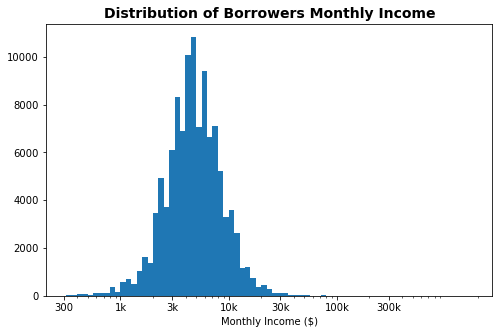

In [14]:
monthly_income = loan_clean['StatedMonthlyIncome'].describe().astype(int)
bins = 10**np.arange(2.5,np.log10(monthly_income.max())+0.05 , 0.05)

plt.figure(figsize = [8, 5])
plt.hist(data = loan_clean, x = 'StatedMonthlyIncome', bins = bins)
plt.xlabel('Monthly Income ($)')
plt.xscale('log')
plt.xticks([300, 1e3, 3e3, 1e4, 3e4, 1e5, 3e5 ], [300, '1k', '3k', '10k', '30k', '100k', '300k'])
plt.title('Distribution of Borrowers Monthly Income', fontsize = 14, fontweight = 'bold')

plt.show()

## Distribution of Debt-To-Income Ratio

The modest bin size for DebtToIncomeRatio proves to be extremely instructive. Its distribution is right-skewed, with most of the loans falling into the low debt-to-income ratio range and few falling into the high debt-to-income range.

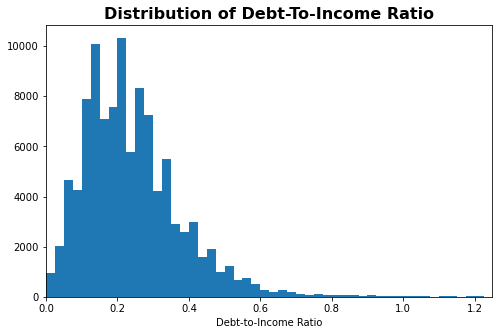

In [15]:
binsize = 0.025

plt.figure(figsize = [8, 5])
bins = np.arange(0, loan_clean['DebtToIncomeRatio'].max()+binsize, binsize)
plt.hist(data = loan_clean, x = 'DebtToIncomeRatio', bins=bins)
plt.xlim([0, 1.25])
plt.xlabel('Debt-to-Income Ratio')
plt.title('Distribution of Debt-To-Income Ratio', fontsize = 16, fontweight = 'bold')

plt.show()

## Distribution of APR & Distribution of Interest Rate

Both variables appear to have a distribution shape that is almost symmetical in character, with a spike between the range of 0.3 and 0.4 of the rates appearing to indicate the modal value of both variables. In comparison to BorrowerIR, BorrowerAPR typically has a greater modal value.

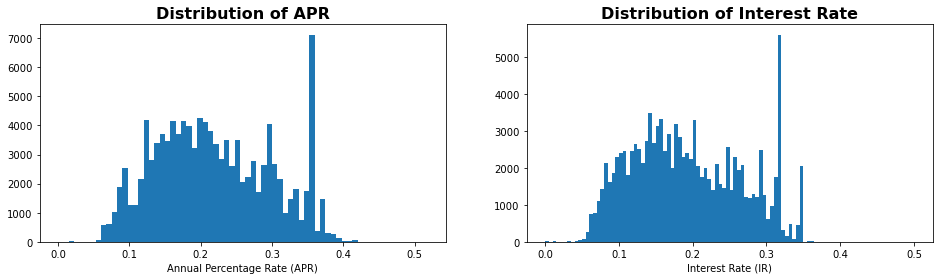

In [16]:
plt.figure(figsize = [16, 4])

plt.subplot(1, 2, 1)
bins = np.arange(0, loan_clean['BorrowerAPR'].max()+0.0075, 0.0075)
plt.hist(data = loan_clean, x = 'BorrowerAPR', bins = bins);
plt.xlabel('Annual Percentage Rate (APR)')
plt.title('Distribution of APR', fontsize = 16, fontweight = 'bold')



plt.subplot(1, 2, 2)
bins_IR = np.arange(0, loan_clean['BorrowerRate'].max()+0.0050, 0.0050)
plt.hist(data = loan_clean, x = 'BorrowerRate', bins = bins_IR);
plt.xlabel('Interest Rate (IR)')
plt.title('Distribution of Interest Rate', fontsize = 16, fontweight = 'bold')

plt.show()

## Proportions of Loan status

The majority of loans granted, or 49.3%, are in the "current loan-status," with "others," which represents closed loans, coming in second with 48.7%. The lowest percentage of loans authorized is for "FinalPaymentInProgress" loans, which is 0.2%. 
Note: Others here are loan status that are (Completed, Chargedoff, Defaulted, Cancelled)

In [17]:
status = loan_clean['LoanStatus'].value_counts()

loan_status = status.reset_index(name = 'counts')
loan_status.rename(columns = {'index': 'status'},  inplace=True)

loan_status

,status,counts
0,Current,55730
1,Completed,38061
2,Chargedoff,11992
3,Defaulted,5018
4,Past Due (1-15 days),800
5,Past Due (31-60 days),361
6,Past Due (61-90 days),311
7,Past Due (91-120 days),304
8,Past Due (16-30 days),265
9,FinalPaymentInProgress,203


In [18]:
loan_active = loan_status.loc[np.r_[0:1, 4:11], :] #active loans are loans that are not closed

loan_active.reset_index(inplace=True)
loan_active.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   8 non-null      int64 
 1   status  8 non-null      object
 2   counts  8 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 320.0+ bytes


In [19]:
loan_active = loan_active[['status', 'counts']]
loan_active['counts'].sum()

57990

In [20]:
loan_inactive = pd.DataFrame(data = {
    'status': ['others'], 
    'counts': [loan_status['counts'].loc[np.r_[1:4, 11:12]].sum()]
})

loan_inactive #inactive loans are the closed loans

,status,counts
0,others,55076


In [21]:
#combining the loan_active and loan_inactive tables together
loan_status = pd.concat([loan_active, loan_inactive])
loan_status.reset_index(inplace=True)

loan_status = loan_status[['status', 'counts']]
loan_status

,status,counts
0,Current,55730
1,Past Due (1-15 days),800
2,Past Due (31-60 days),361
3,Past Due (61-90 days),311
4,Past Due (91-120 days),304
5,Past Due (16-30 days),265
6,FinalPaymentInProgress,203
7,Past Due (>120 days),16
8,others,55076


> others in this table represent loans that are inactive i.e (Completed, Chargedoff, Defaulted, Cancelled)

In [22]:
loan_status_new = loan_status.loc[np.r_[0:1, 6:7, 8:9], :]

loan_status_new.reset_index(inplace=True)
loan_status_new

loan_status_new = loan_status_new[['status', 'counts']]
loan_status_new

,status,counts
0,Current,55730
1,FinalPaymentInProgress,203
2,others,55076


In [23]:
past_dues = pd.DataFrame(data = {
    'status': ['Past Dues'], 
    'counts': [loan_status['counts'].loc[np.r_[1:6, 7:8]].sum()]
})
past_dues #we combine all the past due loans together

,status,counts
0,Past Dues,2057


In [24]:
loan_status = pd.concat([loan_status_new, past_dues])
loan_status.reset_index(inplace=True)

loan_status = loan_status[['status', 'counts']]
loan_status

,status,counts
0,Current,55730
1,FinalPaymentInProgress,203
2,others,55076
3,Past Dues,2057


Our final loan status table.

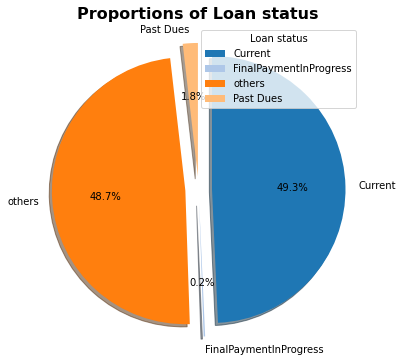

In [25]:
plt.figure(figsize = [8, 6])
colors = sns.color_palette('tab20')
explode = (0.1, 0.1, 0.1, 0.1)
plt.pie(loan_status['counts'], labels = loan_status['status'], explode =explode, 
        counterclock=False, startangle = 90, shadow=True, colors=colors, autopct='%1.1f%%')

plt.title('Proportions of Loan status', fontsize = 16, fontweight = 'bold')
plt.legend(title='Loan status', loc = 1)
plt.axis('square');

## Absolute Frequency of Prosper Risk Levels & Prosper Ratings

It is clear from the countplots that the highest loan distribution belongs to the rating "4.0-C," and the level of risk connected to the greatest loan count is "medium high."

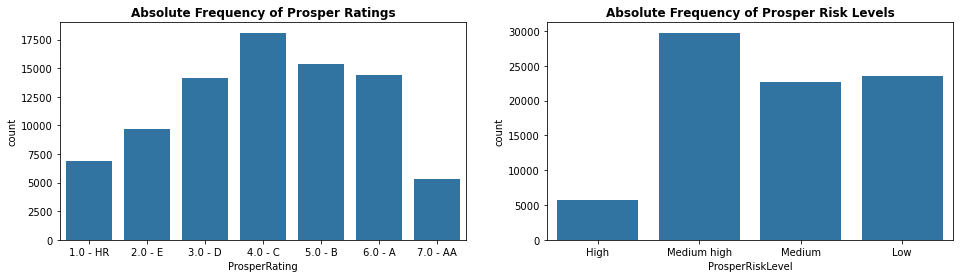

In [26]:
plt.figure(figsize = [16, 4])

base_color = sns.color_palette()[0]

plt.subplot(1, 2, 1)
sns.countplot(data = loan_clean, x = 'ProsperRating', color = base_color)
plt.title('Absolute Frequency of Prosper Ratings', fontsize = 12, fontweight = 'bold')

plt.subplot(1, 2, 2)
sns.countplot(data = loan_clean, x = 'ProsperRiskLevel', color = base_color)
plt.title('Absolute Frequency of Prosper Risk Levels', fontsize = 12, fontweight = 'bold')
plt.show()

## Relative Frequency of Employment status

Employed individuals make up a greater proportion of loan borrowers, while retirees make up the smallest proportion. 

In [27]:
#we assigned gen_order as the variable representing the EmploymentStatus categorical levels
gen_order = loan_clean['EmploymentStatus'].value_counts().index

#we assigned order as the variable representing the ListingCategory categorical levels
order = loan_clean['ListingCategory'].value_counts().index

n_loan = loan_clean['ListingCategory'].value_counts().sum()
print(n_loan)
n_loan_Emp_status = loan_clean['EmploymentStatus'].value_counts().sum()
print(n_loan_Emp_status)

113066
110811


In [28]:
category_counts = loan_clean['ListingCategory'].value_counts()
Employment_stat_counts = loan_clean['EmploymentStatus'].value_counts()

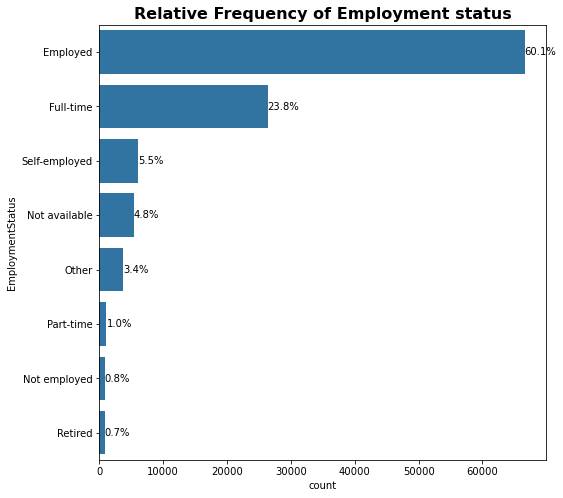

In [29]:
gen_order = loan_clean['EmploymentStatus'].value_counts().index

plt.figure(figsize = [8, 8])
sns.countplot(data = loan_clean, y = 'EmploymentStatus', order = gen_order, color = base_color)
# Logic to print the proportion text on the bars
for i in range (Employment_stat_counts.shape[0]):
    count = Employment_stat_counts[i]
    # Convert count into a percentage, and then into string
    pct_string = '{:0.1f}%'.format(100*count / n_loan_Emp_status)
    # Print the string value on the bar.
    plt.text(count+1, i, pct_string, va = 'center')
    plt.title('Relative Frequency of Employment status', fontsize = 16, fontweight = 'bold')



## Relative Frequency of Listing Category

The majority of borrowers choose to use the loan for debt consolidation when choosing their ListingCategory.
- Debt consolidation: it refers to the act of taking out a new loan to pay off other liabilities and consumer debts.

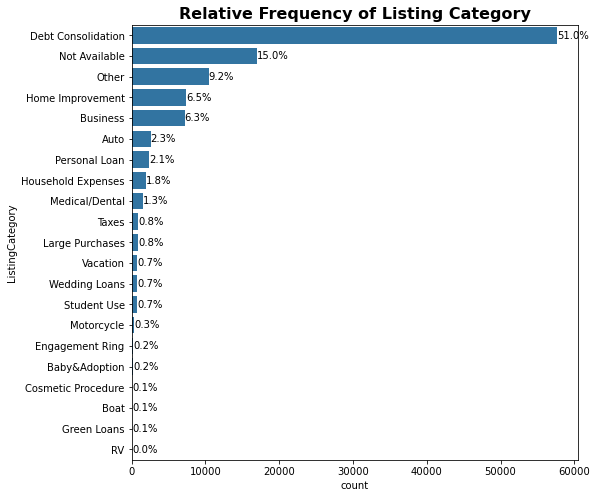

In [30]:
order = loan_clean['ListingCategory'].value_counts().index

plt.figure(figsize = [8, 8])
sns.countplot(data = loan_clean, y = 'ListingCategory', order = order, color = base_color)
# Logic to print the proportion text on the bars
for i in range (category_counts.shape[0]):
    count = category_counts[i]
    # Convert count into a percentage, and then into string
    pct_string = '{:0.1f}%'.format(100*count / n_loan )
    # Print the string value on the bar.
    plt.text(count+1, i, pct_string, va = 'center')
    plt.title('Relative Frequency of Listing Category', fontsize = 16, fontweight = 'bold')



## Proportion Of Loan Terms

It is clear from the donut plot that the loan term that is most frequently offered is 36 months, accounting for 77.1% of all loan counts, and the period with the lowest proportion is 12 months.

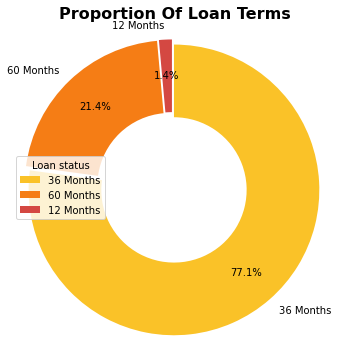

In [31]:
sorted_count = loan_clean['Term'].value_counts()

plt.figure(figsize = [8, 6])

colors = sns.color_palette('inferno_r')
months = ['36 Months', '60 Months', '12 Months']
explodes = (0.02, 0.02, 0.02)

plt.pie(sorted_count, labels = months , autopct='%1.1f%%', pctdistance=0.75,
        explode=explodes, startangle = 90, wedgeprops = {'width' : 0.5}, counterclock = False, colors=colors)

plt.title('Proportion Of Loan Terms', fontsize = 16, fontweight = 'bold')
plt.legend(title='Loan status', loc = 6)
plt.axis('square');

## Correlation OF All Numeric Key Variables

- Debt-to-income ratio and borrower APR have a modest association, indicating that the impact of the ratio on the APR is not very substantial.<br>
- The relationship between borrowerAPR and borrowerrate is negative for both credit score groups (higher & lower). This explains why the borrower is eligible for a reduced APR and interest rate with better credit scores.
- There is an inverse relationship between LoanOriginalAmount and the BorrowerAPR. This indicates that the smaller the loans size, the greater the interest rate applied, the higher the loan size, the smaller the interest rate


In [32]:
annual_income_loan = loan_clean[loan_clean['IncomeRange'].isin(['$25,000-49,999', '$50,000-74,999', '$100,000+',
                                   '$75,000-99,999', '$1-24,999'])]

income = ['$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+']

IncomeClasses = pd.api.types.CategoricalDtype(ordered = True, categories = income)

annual_income_loan['IncomeRange'] = annual_income_loan['IncomeRange'].astype(IncomeClasses)
annual_income_loan['IncomeRange'].unique()

['$25,000-49,999', '$50,000-74,999', '$100,000+', '$75,000-99,999', '$1-24,999']
Categories (5, object): ['$1-24,999' < '$25,000-49,999' < '$50,000-74,999' < '$75,000-99,999' < '$100,000+']

In [33]:
term = [12, 36, 60]

terms = pd.api.types.CategoricalDtype(ordered = True, categories = term)

annual_income_loan['Term'] = annual_income_loan['Term'].astype(terms)
annual_income_loan['Term'].unique()

[36, 60, 12]
Categories (3, int64): [12 < 36 < 60]

In [34]:
numeric_vars = ['BorrowerAPR', 'BorrowerRate', 'LenderYield', 'DebtToIncomeRatio',
                'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'AvailableBankcardCredit',
               'LoanOriginalAmount', 'MonthlyLoanPayment', 'StatedMonthlyIncome']

categorical_vars = ['Term','ProsperRiskLevel', 'ProsperRating', 'IsBorrowerHomeowner', 'IncomeRange']

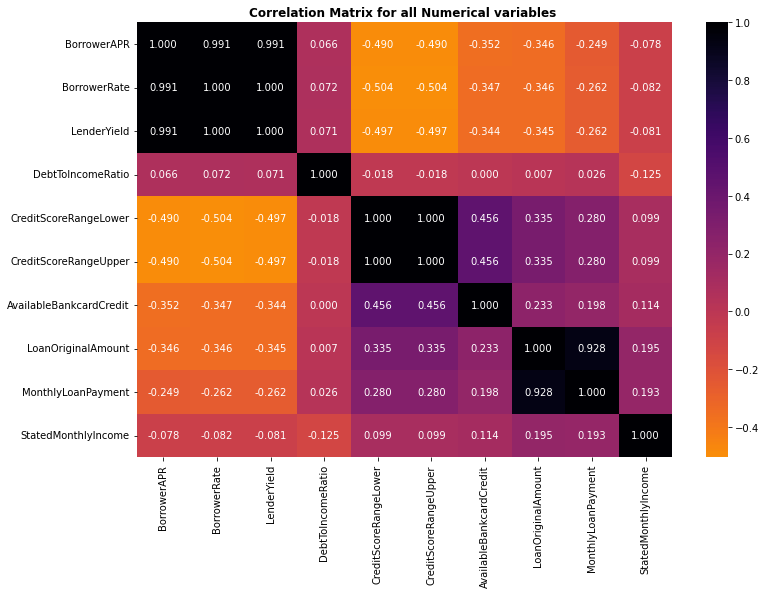

In [35]:
# correlation plot
plt.figure(figsize = [12, 8])
sns.heatmap(annual_income_loan[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'inferno_r', center = 0)
plt.title('Correlation Matrix for all Numerical variables ', fontweight = 'bold')
plt.show()

## Risk Level and Terms By Loan Amount & APR

It's interesting to see that the two important numeric variables appear to have some meaningful correlations with the category variables. The loan amounts awarded to borrowers with the highest risk levels are remarkably small. This relates to a common scenario in which lenders won't be prepared to offer greater loans when they believe the risk to be very high. 

Longer loan terms are linked to higher loan amounts, with a 60-month loan often costing between $10,000 and $15,000. This sum exceeds the average loan amount with a shorter term. As compared to other terms, a shorter loan term offers a lower average annual percentage rate. Ideally, the APR is lower for loans with shorter terms.

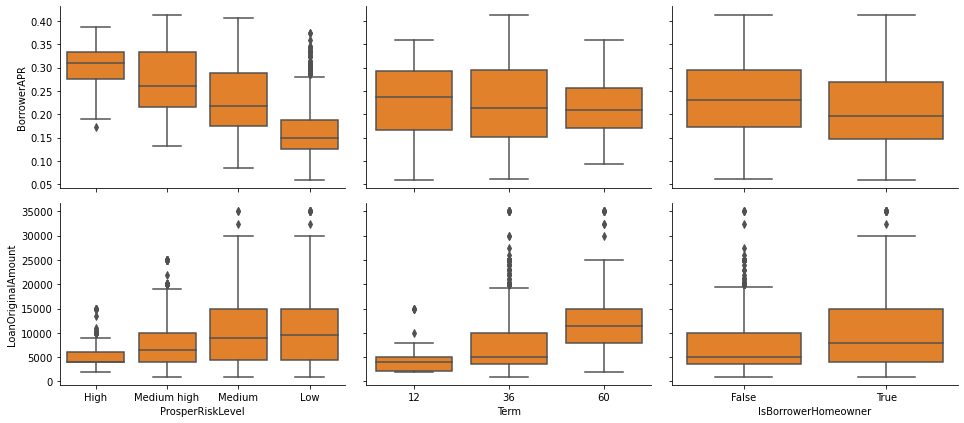

In [36]:
loan_samp = annual_income_loan.sample(n=4000, replace = False) #loan sample of 4000

def boxgrid(x, y, **kwargs):
    """Box plots may be quickly produced using Seaborn's PairGrid.."""
    default_color = sns.color_palette()[1]
    sns.boxplot(x=x, y=y, color=default_color)


g = sns.PairGrid(data = loan_samp, y_vars = ['BorrowerAPR', 'LoanOriginalAmount'],
                x_vars =['ProsperRiskLevel', 'Term', 'IsBorrowerHomeowner'],
                height = 3, aspect = 1.5)
g.map(boxgrid)
plt.show()

## Trends in Average Loan Amount

The average loan amount issued to the borrower decreased from 2007 to 2009, as seen by the line plot, which shows the trends of average loan initial amount for each year starting in 2007. In 2009, the trend reached its lowest point and The reason for this is because prosper closed in 2009 to complete the SEC filing procedure and reopened on July 1st, 2009, following SEC registration. [Prosper 2009](https://onlinemoneyfordads.com/is-prosper-a-scam-get-the-answers-in-my-review/#:~:text=Prosper%20had%20shut%20down%20in%202009%20to%20go,scale%3B%20so%20Prosper%E2%80%99s%20rank%20is%20an%20excellent%20rating).

The average loan amount issued to borrowers increased steadily starting in 2010 and continued through 2014, according to data.

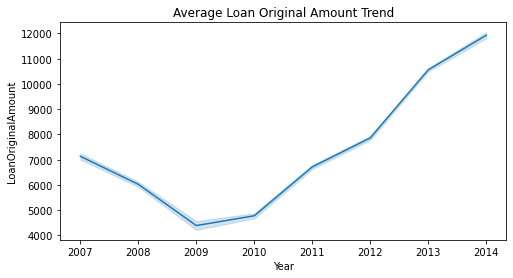

In [37]:
plt.figure(figsize = [8, 4])

sns.lineplot(data = annual_income_loan, x =annual_income_loan[
    'LoanOriginationDate'].dt.year , y = 'LoanOriginalAmount')

plt.xlabel('Year')
plt.title('Average Loan Original Amount Trend')
plt.show()


## Loan Amount By Risk level and Rating

ProsperRating and ProsperRiskLevel have a definite impact on loan amounts, as demonstrated by a dodge point for loans.
There are fewer loans with higher rating grades, which accounts for the wider error bars on the right side. Moreover, according to the highest ratings, "7.0 - AA," there appear to be no loans with a risk level of "High". The number of high-risk loans disbursed at the rating level of "6.0 - A" is lower, but the APR is often lower. This insight shows that loan ratings affect APR more significantly than risk level does.


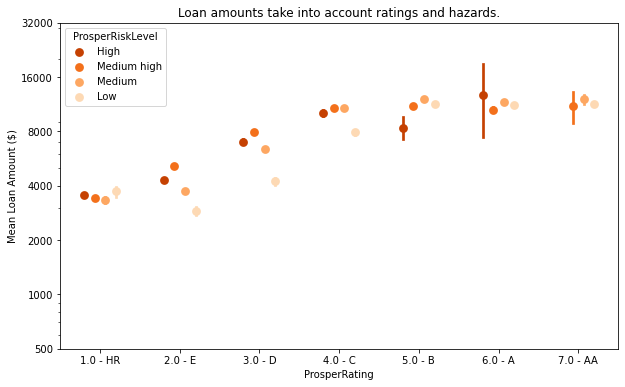

In [38]:
fig = plt.figure(figsize = [10,6])

ax = sns.pointplot(data = annual_income_loan, x = 'ProsperRating', y = 'LoanOriginalAmount', hue = 'ProsperRiskLevel',
           palette = 'Oranges_r', linestyles = '', dodge = 0.4)
plt.title('Loan amounts take into account ratings and hazards.')
plt.ylabel('Mean Loan Amount ($)')
plt.yscale('log')
plt.yticks([5e2, 1e3, 2e3, 4e3, 8e3, 16e3, 32e3], ['500', '1000', '2000', '4000', '8000', '16000', '32000'])
ax.set_yticklabels([],minor = True)
plt.show();

In [39]:
!jupyter nbconvert Prosper_loan_project_II.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Prosper_loan_project_II.ipynb to slides
[NbConvertApp] Writing 975963 bytes to Prosper_loan_project_II.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\james\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\james\anaconda3\lib\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\james\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\james\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "C:\Users\james\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 541, in convert_notebooks
    self.convert_single_notebook(notebook_filename